In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#plt.style.use(['science', 'notebook'])
import sympy as smp
from sympy.integrals.transforms import fourier_transform
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

In [3]:
def ft_analysis(x):
    fourier_coef_list = []
    fourier_coef_list.append(2/np.pi)
    for k in range(x):
        #fourier_coef = ((2/(np.pi*(1 - 4 * k**2)))) * np.exp(1j * (2 * np.pi * 440) * k)
        #fourier_coef = ((2/(np.pi*(1 - 4 * k**2)))) * np.cos(2 * np.pi * k * 440)
        fourier_coef = ((4/(np.pi*(1 - 4 * (k+1)**2)))) * np.cos(2 * np.pi * (k+1) * 440)
        fourier_coef_list.append(fourier_coef)
    return fourier_coef_list

/usr/local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


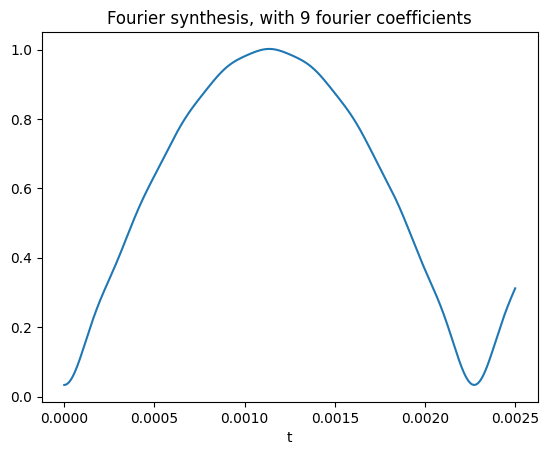

In [4]:
def ft_synthesis(t, n):
    fourier_coefs = ft_analysis(n)
    sig = 0
    for k in range(n):
        sig += fourier_coefs[k] * np.exp(1j * 2 * np.pi * 440 * t * k)
    return sig

t = np.arange(0.0, 0.0025, 0.0000001)
plt.title("Fourier synthesis, with 9 fourier coefficients")
plt.xlabel('t')
plt.plot(t, ft_synthesis(t, 10))

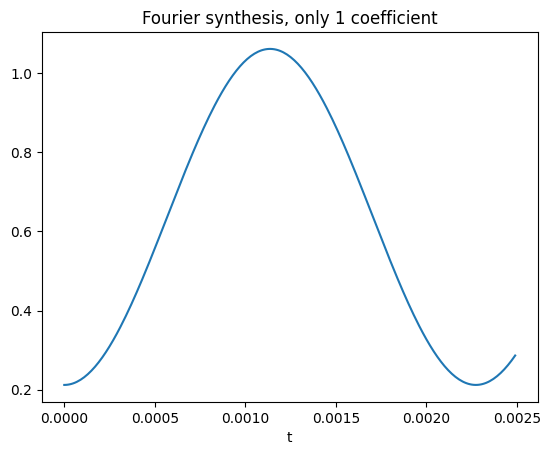

In [296]:
def ft_synthesis(t, n):
    fourier_coefs = ft_analysis(n)
    sig = 0
    for k in range(n):
        sig += fourier_coefs[k] * np.exp(1j * 2 * np.pi * 440 * t * k)
    return sig

t = np.arange(0, 0.0025, 0.00001)
plt.title("Fourier synthesis, only 1 coefficient")
plt.xlabel('t')
plt.plot(t, ft_synthesis(t, 2))

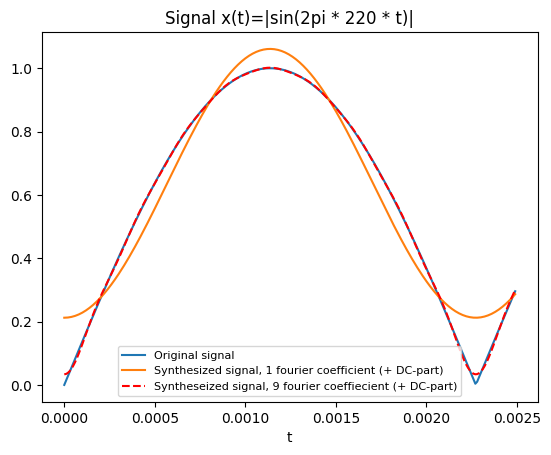

In [504]:
#plt.title("Original signal x(t)=|sin(2pi * 220 * t)|")
plt.xlabel('t')
plt.title("Signal x(t)=|sin(2pi * 220 * t)|")
t = np.arange(0, 0.0025, 0.00001)
plt.plot(t, np.abs(np.sin(2*np.pi * 220 * t)), label="Original signal")
plt.plot(t, ft_synthesis(t, 2), label="Synthesized signal, 1 fourier coefficient (+ DC-part)")
plt.plot(t, ft_synthesis(t, 10), label="Syntheseized signal, 9 fourier coeffiecient (+ DC-part)", color="red", linestyle="dashed")
plt.legend(fontsize=8)

In [313]:
def ft_analysis(x):
    fourier_coef_list = []
    for k in range(x):
        fourier_coef = ((2/(np.pi*(1 - 4 * k**2)))) * np.exp(1j * (2 * np.pi * 440) * k)
        #fourier_coef = ((2/(np.pi*(1 - 4 * k**2)))) * np.cos(2 * np.pi * k * 440)
        fourier_coef_list.append(fourier_coef)
    return fourier_coef_list
i = ft_analysis(4)

i[1]

(-0.2122065907891938-1.3318369624982343e-14j)

<StemContainer object of 3 artists>

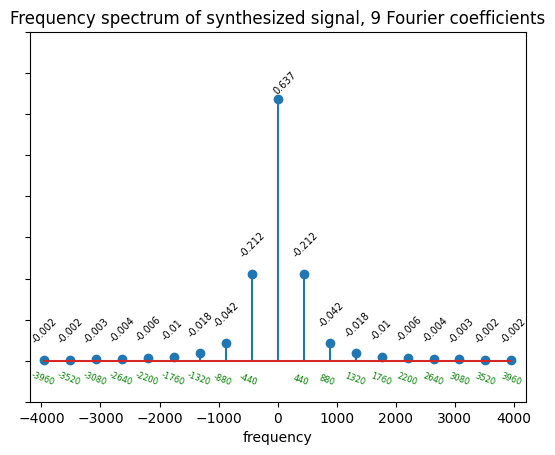

In [436]:
# Frequency and sampling rate
n = 10
freq = 440
list = []
    
for x in range(n-1):
    list.append(440 * (x+1))

y = ft_analysis(n)
dc = y.pop(0)
y_neg = y.copy()
y_neg.reverse()
y =  y_neg + y
yabs = [np.abs(x) for x in y]
y = [np.real(x) for x in y]
#y.insert(7, dc)

list_neg = [x*-1 for x in list]
list_neg.reverse()
list = list_neg + list

plt.title("Frequency spectrum of synthesized signal, 9 Fourier coefficients")
plt.stem(0, dc)
plt.xlim(-4200, 4200)
plt.ylim(-0.1, 0.8)
plt.xlabel("frequency")
ax = plt.gca()
ax.yaxis.set_ticklabels([])

for x in range(n-1):
    plt.annotate(np.round(y[x], 3), (-4200 + 440 * x, np.abs(y[x])+0.04), fontsize= 7, rotation=45)
    plt.annotate(-3960 + (440*x), (-4200 + 440 * x, -0.06), fontsize= 6, rotation=-20, color="green")
  
    
for x in range(n-1):
    plt.annotate(np.round(y[x + 9], 3), (440 * (x+1)-220, np.abs(y[x+9])+0.04), fontsize=7, rotation=45)
    plt.annotate((440*(x+1)), (440 * (x+1) - 200, -0.06), fontsize= 6, rotation=-20, color="green")
    
plt.annotate(np.round(np.real(dc), 3), (-100, 0.65), rotation=45, fontsize=7)
plt.stem(list, yabs)

<StemContainer object of 3 artists>

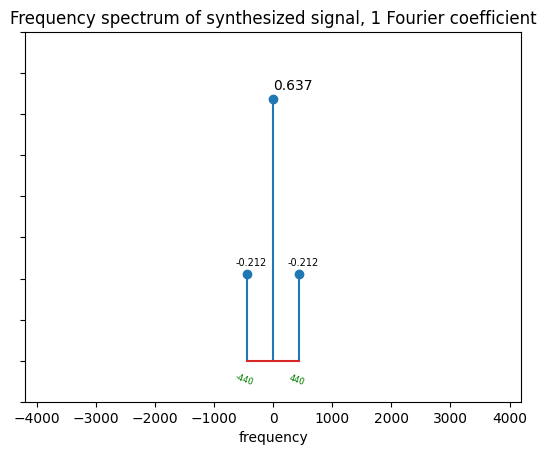

In [485]:
# Frequency and sampling rate
n = 2
freq = 440
list = []
    
for x in range(n-1):
    list.append(440 * (x+1))

y = ft_analysis(n)
dc = y.pop(0)
y_neg = y.copy()
y_neg.reverse()
y =  y_neg + y
yabs = [np.abs(x) for x in y]
y = [np.real(x) for x in y]
#y.insert(7, dc)

list_neg = [x*-1 for x in list]
list_neg.reverse()
list = list_neg + list

plt.title("Frequency spectrum of synthesized signal, 1 Fourier coefficient")

plt.stem(0, dc)
plt.xlim(-4200, 4200)
plt.ylim(-0.1, 0.8)
plt.xlabel("frequency")
ax = plt.gca()
ax.yaxis.set_ticklabels([])


plt.annotate(np.round(y[x], 3), (-640, np.abs(y[x])+0.02), fontsize= 7)

plt.annotate(np.round(y[x], 3), (240 * (1), np.abs(y[0])+0.02), fontsize=7)
for x in range(n-1):
    plt.annotate((440*(x+1)), (440 * (x+1) - 200, -0.06), fontsize= 6, rotation=-20, color="green")
    plt.annotate(-440, (-660, -0.06), fontsize= 6, rotation=-20, color="green")
    
plt.annotate(np.round(np.real(dc), 3), (0, 0.66))
plt.stem(list, yabs,)


/var/folders/ky/44dcn1r52sjftz_w888hkb800000gn/T/ipykernel_56167/1234047735.py:24: RuntimeWarning: divide by zero encountered in log
  plt.plot(t, 10 * np.log(p1_d(t)))


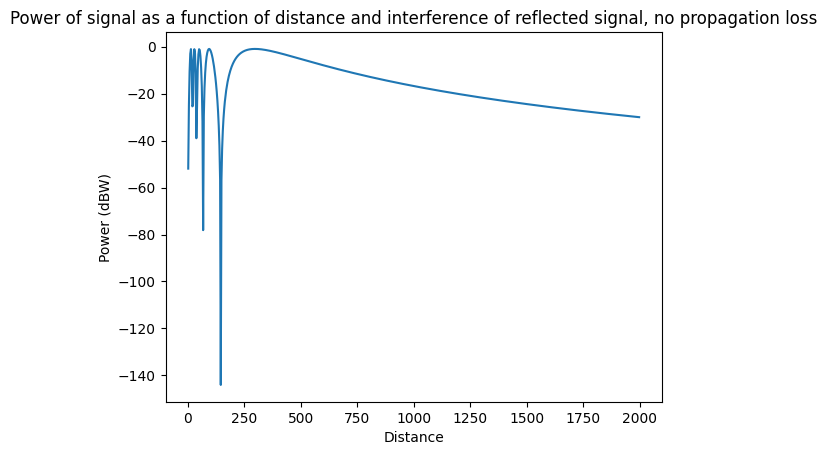

In [32]:


def d_1(x):
    return np.sqrt(28.5**2 + x**2)

def d_2(x):
    return np.sqrt(30**2 + ((20*x)/21)**2) + np.sqrt(1.5**2 + (x/21)**2)

def a_d(d):
    #return np.abs(np.sqrt(20)* (np.exp(-1j * 2 * np.pi * (d_1(d)/ 0.6) - np.exp(-1j * 2 * np.pi * (d_2(d)/ 0.6)))))
    return np.sqrt(100 * (2-2*np.cos(2*np.pi *(d_1(d)/ 0.6) - 2*np.pi * (d_2(d)/ 0.6))))

def p1_d(d):
    return ((0.36/ (16*np.pi**2))) * a_d(d)**2

def p1_d_pLoss(d):
    return ((0.36/ (16*np.pi**2 * d_1(d)**2) * a_d(d)**2))


t = np.arange(0, 2000, 3)
#plt.xscale("log")
plt.ylabel("Power (dBW)")
plt.xlabel("Distance")
plt.title("Power of signal as a function of distance and interference of reflected signal, no propagation loss")
#plt.plot(t, p1_d_pLoss(t))
plt.plot(t, 10 * np.log(p1_d(t)))

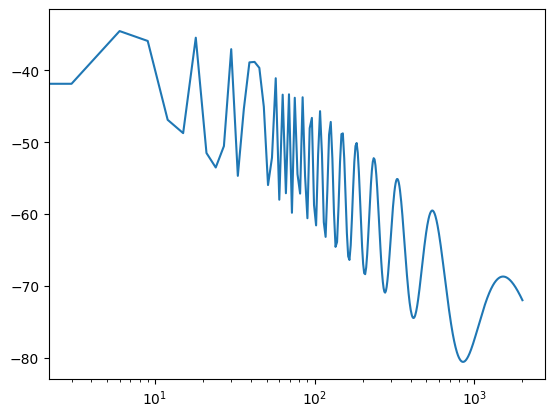

In [192]:
def p2_d(d):
    return (0.36/ (16*np.pi**2 * d_1(d)**2)) * a_d(d)**2
t = np.arange(0, 2000, 3)
plt.xscale("log")
plt.plot(t, 10 * np.log10(p2_d(t)))